In [1270]:
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import pandas as pd
import numpy as np

<h1>Исследовательский анализ данных </h1>

<h2>1.1 Словесное описание признаков</h2>

<h3>data.csv</h3>
<ul>
<li>id: транзакции <\li>
<li>timestamp: дата продажи (транзакции) <\li>
<li>full_sq: общая площадь <\li>
<li>life_sq: жилая площадь <\li>
<li>floor: этаж <\li>
<li>max_floor: количество этажей в здании <\li>
<li>material: материал, из которого изговолены стены <\li>
<li>build_year: год строительства <\li>
<li>num_room: количество жилых комнат <\li>
<li>kitch_sq: площадь кухни <\li>
<li>full_all: количество населения в регионе <\li>
<li>state: жилищные условия <\li>
<li>sub_area: название территории <\li>
<li>price_doc: цена квартиры (целевая переменная) <\li>
</ul>
<h3>macro.csv</h3>
<ul>
<li>timestamp : дата, на которую актуальны макроэкономические показатели <\li>
<li>salary : средняя зарплата в регионе <\li>
<li>fixed_basket: стоимость потребительской корзины <\li>
<li>rent_price_3room_eco: стоимость аренды 3-х комнатного жилья эконом-класса <\li>
<li>rent_price_2room_eco: стоимость аренды 2-х комнатного жилья эконом-класса <\li>
<li>rent_price_1room_eco: стоимость аренды 1-но комнатного жилья эконом-класса <\li>
<li>average_life_exp: средняя продолжительность жизни в регионе <\li> 
<\ul>

<h2>1.2 Загрузка данных общее описание набора данных</h2>

In [1271]:
data_train=pd.read_csv("train.csv",sep=",")
data_macro=pd.read_csv("macro.csv",sep=",")

In [1272]:
data_train.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
0,13324,2013-12-23,42,28.0,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,Pechatniki,7100000
1,10064,2013-08-26,55,41.0,4.0,3.0,5.0,2.0,1960.0,3.0,5.0,21040,Dorogomilovo,11500000
2,12022,2013-11-11,43,29.0,4.0,2.0,5.0,2.0,1960.0,2.0,5.0,157010,Ivanovskoe,5800000
3,10186,2013-08-30,62,35.0,15.0,NaN,22.0,1.0,1985.0,2.0,10.0,178264,Jasenevo,11400000
4,30052,2015-05-29,80,55.0,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154


In [1273]:
data_macro.head()

,timestamp,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,2010-01-01,38410.5,11443.63,NaN,NaN,NaN,74.2
1,2010-01-02,38410.5,11443.63,NaN,NaN,NaN,74.2
2,2010-01-03,38410.5,11443.63,NaN,NaN,NaN,74.2
3,2010-01-04,38410.5,11443.63,NaN,NaN,NaN,74.2
4,2010-01-05,38410.5,11443.63,NaN,NaN,NaN,74.2


In [1274]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15092 entries, 0 to 15091
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          15092 non-null  int64  
 1   timestamp   15092 non-null  object 
 2   full_sq     15092 non-null  int64  
 3   life_sq     13828 non-null  float64
 4   floor       15069 non-null  float64
 5   state       12366 non-null  float64
 6   max_floor   13938 non-null  float64
 7   material    13938 non-null  float64
 8   build_year  13475 non-null  object 
 9   num_room    13938 non-null  float64
 10  kitch_sq    13938 non-null  float64
 11  full_all    15092 non-null  int64  
 12  sub_area    15092 non-null  object 
 13  price_doc   15092 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 1.6+ MB


In [1275]:
data_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


In [1276]:
data_train.shape

(15092, 14)

In [1277]:
data_macro.shape

(2484, 7)

In [1278]:
data_train.describe()

,id,full_sq,life_sq,floor,state,max_floor,material,num_room,kitch_sq,full_all,price_doc
count,15092.000000,15092.000000,13828.000000,15069.000000,12366.000000,13938.000000,13938.000000,13938.000000,13938.00000,1.509200e+04,1.509200e+04
mean,18772.427710,53.967002,33.784929,7.283297,2.194889,12.419142,1.895824,1.934783,7.28060,1.592291e+05,7.564667e+06
std,7102.906802,48.081978,19.794406,5.194017,0.860994,6.264204,1.511353,0.865651,30.07194,3.037953e+05,4.985187e+06
min,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00000,2.546000e+03,3.314640e+05
25%,13464.750000,38.000000,20.000000,3.000000,2.000000,9.000000,1.000000,1.000000,5.00000,4.843900e+04,5.100000e+06
50%,19005.500000,49.000000,30.000000,6.000000,2.000000,12.000000,1.000000,2.000000,7.00000,8.771300e+04,6.650000e+06
75%,24746.250000,63.000000,43.000000,10.000000,3.000000,17.000000,2.000000,3.000000,9.00000,1.253540e+05,8.900000e+06
max,30473.000000,5326.000000,637.000000,77.000000,33.000000,57.000000,6.000000,19.000000,2014.00000,1.716730e+06,9.512250e+07


In [1279]:
data_macro.describe()

,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
count,2191.000000,2484.000000,2211.000000,2211.000000,2211.000000,2191.000000
mean,52188.933090,15331.497987,47.299711,38.895364,31.002442,75.928247
std,9068.558976,2789.136259,3.070219,5.035190,3.984142,0.869941
min,38410.500000,11443.630000,37.540000,0.100000,2.310000,74.200000
25%,44898.700000,12992.440000,45.530000,37.930000,29.780000,75.740000
50%,48830.400000,14983.920000,47.350000,39.470000,31.110000,75.790000
75%,61208.000000,18295.070000,49.350000,41.300000,33.060000,76.700000
max,64310.000000,20422.500000,53.210000,43.850000,35.370000,76.770000


<h4>Первичные выводы</h4>

<ul>
<li>Размер выборки в data_train порядка 15000, классов- 12 </li>
<li>Размер выборки в data_marco порядка 2484, классов- 6 </li>
<li>build_year, timestamp,sub_area представлены как object, при анализе нужно будет изменить тип данных</li>
<li>неудобное представление timestamp</li>
<li>Большое количество null-значений как в macro.csv, так и в train.csv</li>
<li>Большая разница между минимальным и максимальным значениями цены, что говорит о выбросах,также это наблюдается и в других признаках</li>
</ul>

<h2>Визуальный и статистический анализ данных</h2>

<h3>Проанализируем данные по отдельности</h3>

In [1280]:
def GetAnalysis(name,d):
    df=d[name].value_counts().rename_axis(name).reset_index(name='counts')
    sns.barplot(data=df, x=name, y="counts",linewidth=10,errwidth = 2)

<h4>1)full_sq</h4>

<AxesSubplot:xlabel='full_sq'>

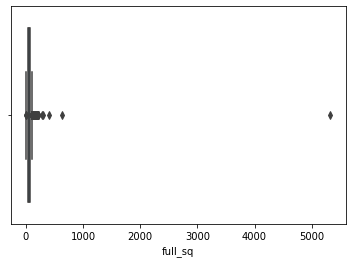

In [1281]:
sns.boxplot(x=data_train["full_sq"])

<p>Заметим явные выбросы в данных</p>

<AxesSubplot:xlabel='full_sq', ylabel='Count'>

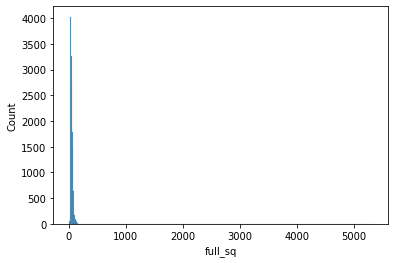

In [1282]:
sns.histplot(data_train["full_sq"], binwidth=10)

<h4>2)life_sq</h4>

<AxesSubplot:xlabel='life_sq'>

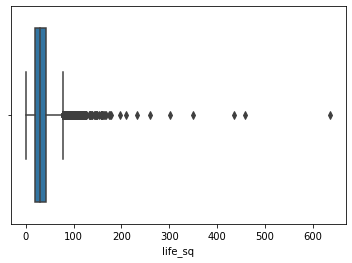

In [1283]:
sns.boxplot(x=data_train["life_sq"])

<AxesSubplot:xlabel='life_sq', ylabel='Count'>

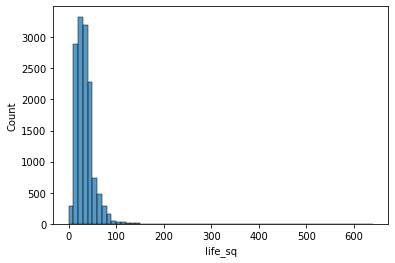

In [1284]:
sns.histplot(data_train["life_sq"], binwidth=10)

<p>В данных также присутствуют выбросы. Можно заметить, что жилая площадь находится в диапазоне от 0 до 100</p>
<p>Также есть значения равные 0</p>

<h4>3)floor</h4>

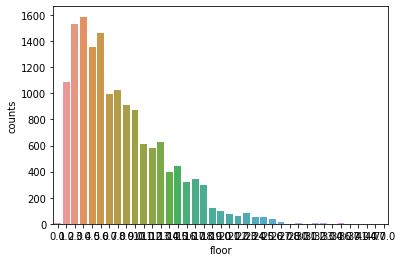

In [1285]:
GetAnalysis("floor",data_train)

<AxesSubplot:ylabel='floor'>

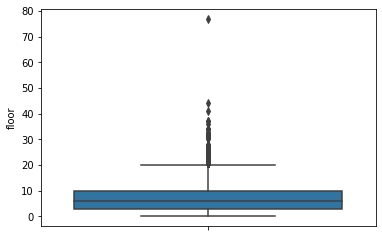

In [1286]:
sns.boxplot(y=data_train["floor"])

<p>95% данных находится в диапазоне от 0 до ,примерно, 21 этажей. В данных также присутствуют значения равные 0 и выбросы</p>

<h4>4)max_floor</h4>

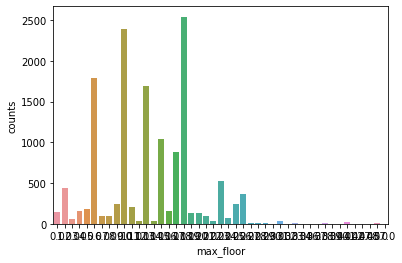

In [1287]:
GetAnalysis("max_floor",data_train)

<AxesSubplot:ylabel='max_floor'>

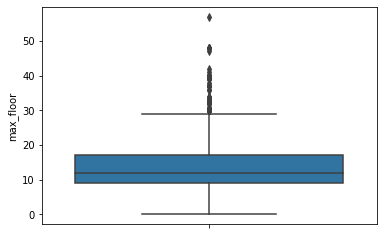

In [1288]:
sns.boxplot(y=data_train["max_floor"])

<p>В большинстве домов количетсво этажей от 9 до 18</p>

<h4>5)material</h4>

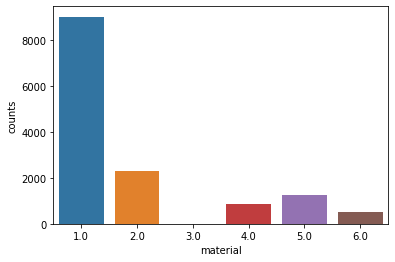

In [1289]:
GetAnalysis("material",data_train)

<p>Большая часть домой была изготовлена из 1 материала, также совсем незначительная часть из 3</p>

<h4>6)num_room</h4>

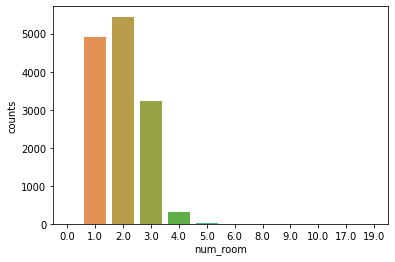

In [1290]:
GetAnalysis("num_room",data_train)

<AxesSubplot:ylabel='num_room'>

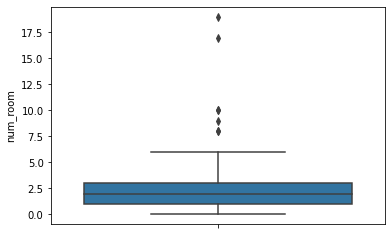

In [1291]:
sns.boxplot(y=data_train["num_room"])

<p>В основном в данных представлены 1,2,3 комнатные квартиры</p>

<h4>7)kitch_sq</h4>

<AxesSubplot:ylabel='kitch_sq'>

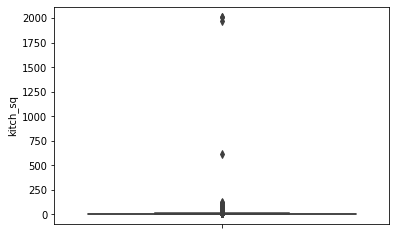

In [1292]:
sns.boxplot(y=data_train["kitch_sq"])

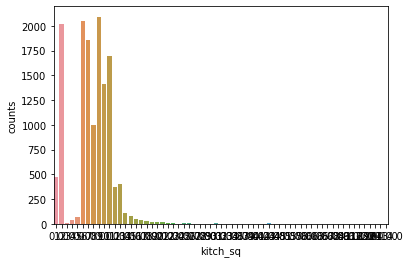

In [1293]:
GetAnalysis("kitch_sq",data_train)

<p>Довольно "загрязненные данные"</p>

<h4>8)full_all</h4>

<AxesSubplot:ylabel='full_all'>

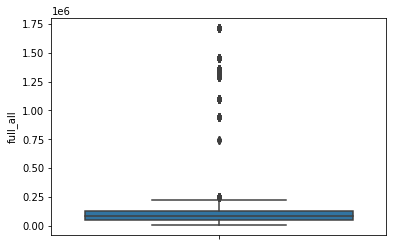

In [1294]:
sns.boxplot(y=data_train["full_all"])

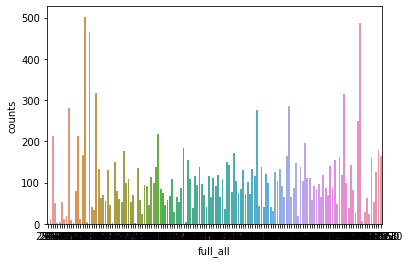

In [1295]:
GetAnalysis("full_all",data_train)

<p>В данных присутствуют выбросы</p>

<h4>9)state</h4>

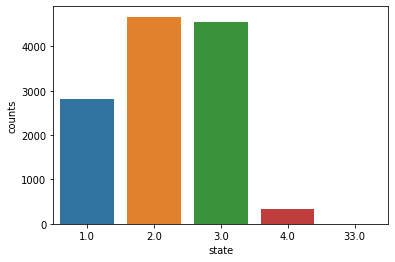

In [1296]:
GetAnalysis("state",data_train)

<AxesSubplot:ylabel='state'>

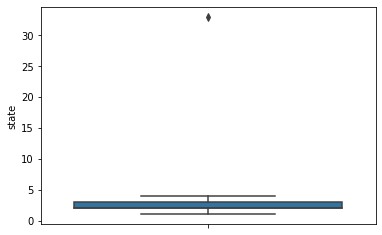

In [1297]:
sns.boxplot(y=data_train["state"])

<p>Жилизные условия лежат в диапазоне от 1 до 4, 33-выброс</p>

<h4>10)sub_area</h4>

In [1298]:
data_train.groupby("sub_area").count()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,price_doc
sub_area,,,,,,,,,,,,,
Ajeroport,62,62,62,61,62,55,59,59,59,59,59,62,62
Akademicheskoe,126,126,126,126,126,103,118,118,118,118,118,126,126
Alekseevskoe,53,53,53,52,53,47,49,49,49,49,49,53,53
Altuf'evskoe,39,39,39,39,39,29,38,38,38,38,38,39,39
Arbat,6,6,6,6,6,4,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vyhino-Zhulebino,159,159,159,159,159,149,153,153,153,153,153,159,159
Zamoskvorech'e,31,31,31,29,31,27,31,31,31,31,31,31,31
Zapadnoe Degunino,143,143,143,118,143,121,133,133,121,133,133,143,143


<p>В таблице видно 146 территорий. Довольно сложно для составления график</p>

<h4>11)price_doc</h4>

<AxesSubplot:ylabel='price_doc'>

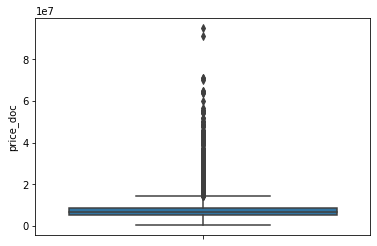

In [1299]:
sns.boxplot(y=data_train["price_doc"])

<p>Довольно много выбросов</p>

<h4>12)salary</h4>

<AxesSubplot:ylabel='salary'>

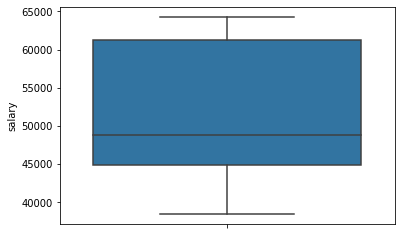

In [1300]:
sns.boxplot(y=data_macro["salary"])

<p>Зарплата находится в диапазоне от 45000 до 61000</p>

<h4>13)fixed_basket</h4>

<AxesSubplot:ylabel='fixed_basket'>

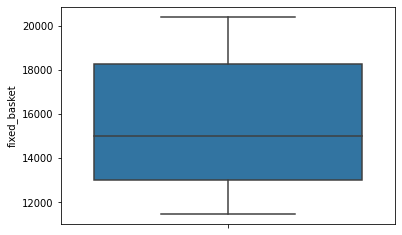

In [1301]:
sns.boxplot(y=data_macro["fixed_basket"])

<p>Потребительская карзина находится в диапазоне от 13000 до 18000</p>

<h4>14)rent_price_3room_eco</h4>

<AxesSubplot:ylabel='rent_price_3room_eco'>

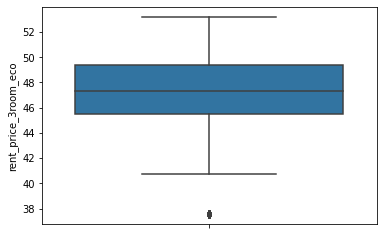

In [1302]:
sns.boxplot(y=data_macro["rent_price_3room_eco"])

<p>В данных присутствуют выбросы</p>

<h4>15)rent_price_2room_eco</h4>

<AxesSubplot:ylabel='rent_price_2room_eco'>

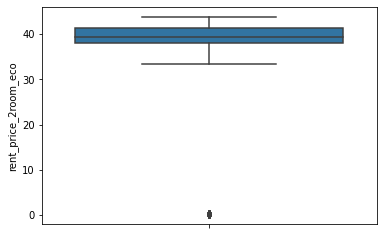

In [1303]:
sns.boxplot(y=data_macro["rent_price_2room_eco"])

<p>В данных присутствуют выбросы</p>

<h4>16)rent_price_1room_eco</h4>

<AxesSubplot:ylabel='rent_price_1room_eco'>

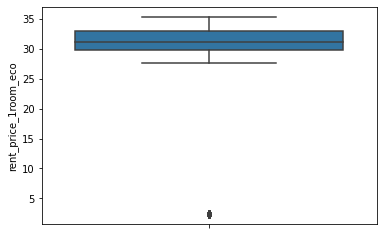

In [1304]:
sns.boxplot(y=data_macro["rent_price_1room_eco"])

<p>В данных присутствуют выбросы</p>

<h4>17)average_life_exp</h4>

<AxesSubplot:ylabel='average_life_exp'>

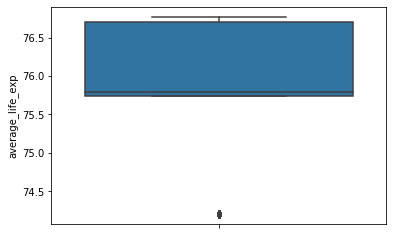

In [1305]:
sns.boxplot(y=data_macro["average_life_exp"])

<p>средняя продолжительность жизни в районе 76 лет</p>

<h3>Визуализацию данных во взаимосвязи буду делать после удаления выбросов, т.к. графики отображаются некорректно</h3>

<h2>Заполнение пропусков и обработка выбросов в данных</h2>

<h3>Удалим данные, в которых все значения null</h3>

In [1306]:
data_train[data_train.life_sq.isnull() & data_train.floor.isnull() & data_train.state.isnull()  & data_train.max_floor.isnull()  & data_train.material.isnull()  & data_train.build_year.isnull()  & data_train.num_room.isnull()  & data_train.kitch_sq.isnull()]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
5377,3697,2012-09-18,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7341,Poselenie Moskovskij,3231004
7301,4385,2012-10-25,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17790,Poselenie Vnukovskoe,4773449


In [1307]:
data_train=data_train.drop(data_train[data_train.life_sq.isnull() & data_train.floor.isnull() & data_train.state.isnull()  & data_train.max_floor.isnull()  & data_train.material.isnull()  & data_train.build_year.isnull()  & data_train.num_room.isnull()  & data_train.kitch_sq.isnull()].index)

<h3>1)Изменим num_room </h3>

<h3>Вспомним, что количество комнат большее 4-выборсы, а также равное 0</h3>

In [1308]:
data_train=data_train.drop(data_train[data_train.num_room>4].index)
data_train=data_train.drop(data_train[data_train.num_room==0].index)

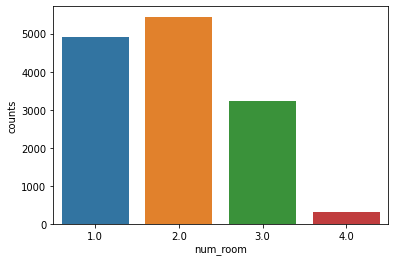

In [1309]:
GetAnalysis("num_room",data_train)

In [1310]:
print(len(data_train[data_train.num_room.isnull()]))

1152


<p>У 1152 квартир неизвестно кол-во комнат, установим их исходя из общей площади</p>

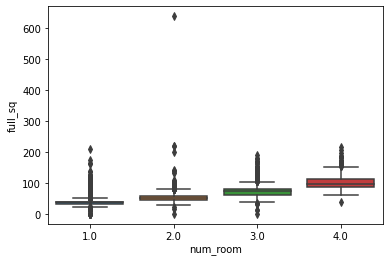

In [1311]:
sns.boxplot(x='num_room', y='full_sq', data=data_train);

<h3>Объявим функцию для удаления выбросов </h3>

<p>будем удалять данные, которые выходят за "усы" ящика</p>

In [1312]:
def delete_emissions(conditions):
    global data_train
    Q1 =  data_train[data_train[conditions[0]]==conditions[2]][conditions[1]].quantile(0.25)
    Q3 = data_train[data_train[conditions[0]]==conditions[2]][conditions[1]].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    data_train=data_train.drop(data_train[(data_train[conditions[0]]==conditions[2])&((data_train[conditions[1]] < Q1-1.5*IQR) | (data_train[conditions[1]] > Q3+1.5*IQR))].index)

In [1313]:
for i in range(1,5):
    delete_emissions(["num_room","full_sq",i])

33.0 40.0 7.0
44.0 58.0 14.0
62.0 79.0 17.0
85.75 112.0 26.25


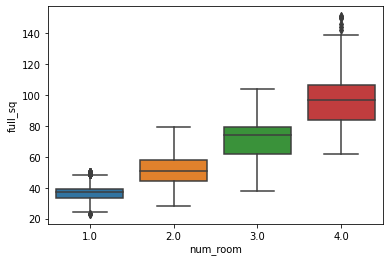

In [1314]:
sns.boxplot(x='num_room', y='full_sq', data=data_train);

<p>Соотнесем площади и кол-во комнат, диапазоны будем брать из графика</p>

In [1315]:
data_train.loc[(data_train.num_room.isnull())&(data_train["full_sq"]<44),'num_room']=1
data_train.loc[(data_train.num_room.isnull())&(data_train["full_sq"]>=44)&(data_train["full_sq"]<62),'num_room']=2
data_train.loc[(data_train.num_room.isnull())&(data_train["full_sq"]>=62)&(data_train["full_sq"]<85.75),'num_room']=3
data_train.loc[(data_train.num_room.isnull())&(data_train["full_sq"]>=85.75),'num_room']=4

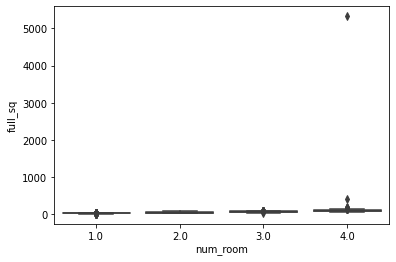

In [1316]:
sns.boxplot(x='num_room', y='full_sq', data=data_train);

<p>т.к были добавлены новые данные, то появились выбросы</p>

In [1317]:
for i in range(1,5):
    delete_emissions(["num_room","full_sq",i])

33.0 39.0 6.0
44.0 58.0 14.0
63.0 79.0 16.0
88.0 111.0 23.0


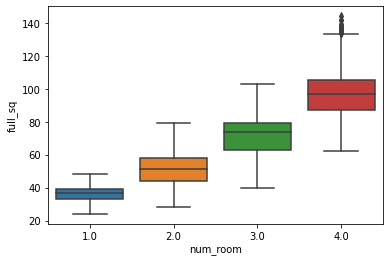

In [1318]:
sns.boxplot(x='num_room', y='full_sq', data=data_train);

<h3>2)Изменим life_sq в зависимости от кол-ва комнат и удалим выбросы</h3>

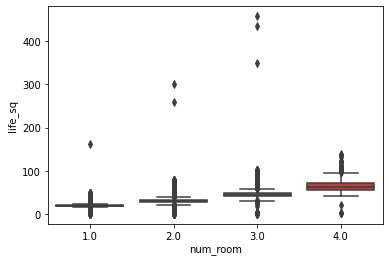

In [1319]:
sns.boxplot(x='num_room', y='life_sq', data=data_train);

<p>удалим выбросы</p>

In [1320]:
for i in range(1,5):
    delete_emissions(['num_room','life_sq',i])

18.0 20.0 2.0
28.0 33.0 5.0
41.0 48.0 7.0
55.0 71.0 16.0


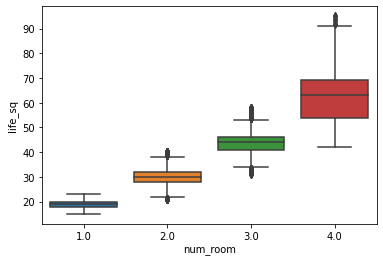

In [1321]:
sns.boxplot(x='num_room', y='life_sq', data=data_train);

<p>изменим life_sq в зависимости от кол-ва комнат</p>

In [1322]:
data_train.groupby("num_room").mean()

,id,full_sq,life_sq,floor,state,max_floor,material,kitch_sq,full_all,price_doc
num_room,,,,,,,,,,
1.0,18149.057588,36.258033,18.721589,7.153238,2.367513,12.684865,1.893243,7.400541,171590.373455,5.314286e+06
2.0,18827.584490,50.408776,29.393236,6.699305,2.348245,11.577826,1.922609,6.970870,174258.281837,7.066688e+06
3.0,18913.625745,70.194669,43.624761,7.297790,2.439490,12.292354,1.625562,8.534858,166374.551736,9.864505e+06
4.0,17849.472313,95.671010,62.947183,7.312704,2.493671,13.145038,1.767176,9.213740,144008.690554,1.519776e+07


In [1323]:
data_train.loc[(data_train.life_sq.isnull())&(data_train["num_room"]==1),'life_sq']=18.721
data_train.loc[(data_train.life_sq.isnull())&(data_train["num_room"]==2),'life_sq']=29.393
data_train.loc[(data_train.life_sq.isnull())&(data_train["num_room"]==3),'life_sq']=43.624
data_train.loc[(data_train.life_sq.isnull())&(data_train["num_room"]==4),'life_sq']=62.947

<h3>3)Изменим kitch_sq в зависимости от кол-ва комнат и удалим выбросы</h3>

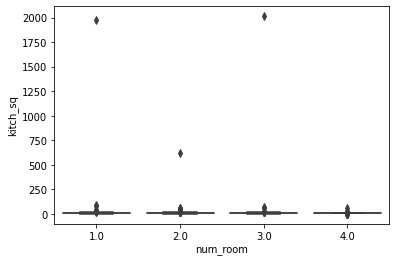

In [1324]:
sns.boxplot(x='num_room', y='kitch_sq', data=data_train);

<p>удалим выбросы</p>

In [1325]:
for i in range(1,5):
    delete_emissions(['num_room','kitch_sq',i])

5.0 9.0 4.0
5.0 9.0 4.0
6.0 10.0 4.0
8.0 10.0 2.0


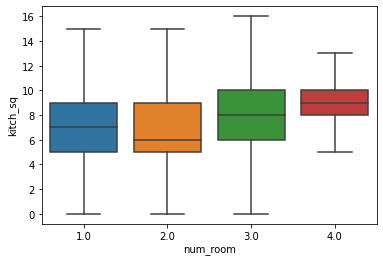

In [1326]:
sns.boxplot(x='num_room', y='kitch_sq', data=data_train);

In [1327]:
data_train.groupby("num_room").mean()

,id,full_sq,life_sq,floor,state,max_floor,material,kitch_sq,full_all,price_doc
num_room,,,,,,,,,,
1.0,18141.886358,36.256747,18.721289,7.155979,2.367379,12.682643,1.893582,6.802600,171707.112899,5.316593e+06
2.0,18816.949979,50.346453,29.377481,6.694251,2.351452,11.561817,1.912407,6.755352,174815.978885,7.067003e+06
3.0,18894.186620,70.134507,43.610217,7.297887,2.442833,12.278510,1.620248,7.702672,166687.733099,9.867465e+06
4.0,17600.641304,93.847826,62.420841,7.231884,2.576190,13.506494,1.623377,8.870130,149208.992754,1.490059e+07


In [1328]:
data_train.loc[(data_train.kitch_sq.isnull())&(data_train["num_room"]==1),'kitch_sq']=6.80
data_train.loc[(data_train.kitch_sq.isnull())&(data_train["num_room"]==2),'kitch_sq']=6.75
data_train.loc[(data_train.kitch_sq.isnull())&(data_train["num_room"]==3),'kitch_sq']=7.70
data_train.loc[(data_train.kitch_sq.isnull())&(data_train["num_room"]==4),'kitch_sq']=8.87
#заметим интересный факт, у двухкомнатной квартиры самая маленькая площадь кухни

<h3>4)Изменим build_year и удалим выбросы</h3>

In [1329]:
data_train['build_year']=pd.to_numeric(data_train["build_year"],errors="coerce")

<p>Удалим выбросы</p>

<AxesSubplot:ylabel='build_year'>

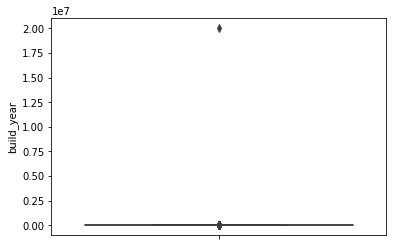

In [1330]:
sns.boxplot(y=data_train["build_year"])

In [1331]:
data_train=data_train.drop(data_train[data_train.build_year>2022].index)

<AxesSubplot:ylabel='build_year'>

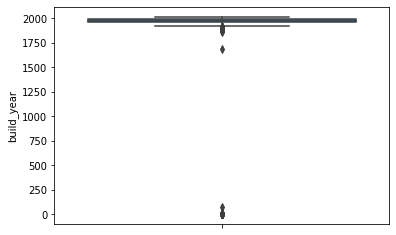

In [1332]:
sns.boxplot(y=data_train["build_year"])

In [1333]:
data_train=data_train.drop(data_train[data_train.build_year<1750].index)

<AxesSubplot:ylabel='build_year'>

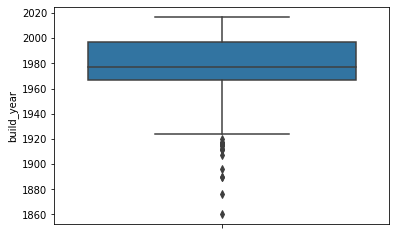

In [1334]:
sns.boxplot(y=data_train["build_year"])

In [1335]:
data_train=data_train.drop(data_train[data_train.build_year<1922].index)

<AxesSubplot:ylabel='build_year'>

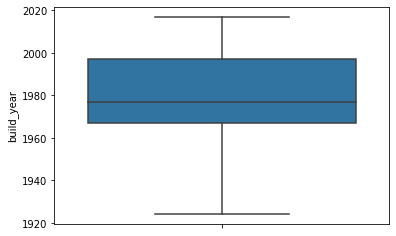

In [1336]:
sns.boxplot(y=data_train["build_year"])

<p>присвоим null-значениям среднее значение</p>

In [1337]:
data_train.loc[data_train.build_year.isnull(),'build_year']=int(data_train['build_year'].mean())

<h3>5)Изменим matetial и удалим выбросы</h3>

<h4>Вспомним, что материал 3 было немного </h4>

In [1338]:
data_train=data_train.drop(data_train[data_train["material"]==3].index)

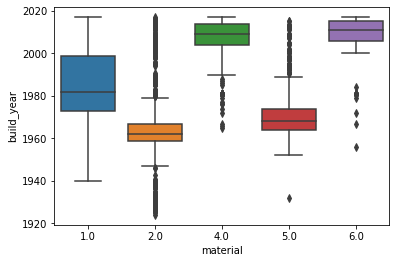

In [1339]:
sns.boxplot(x='material', y='build_year', data=data_train);

<p>удалим выбросы</p>

In [1340]:
for i in range(1,7):
    if i==3:
        continue
    delete_emissions(['material','build_year',i])

1973.0 1999.0 26.0
1959.0 1967.0 8.0
2004.0 2014.0 10.0
1964.0 1974.0 10.0
2006.0 2015.0 9.0


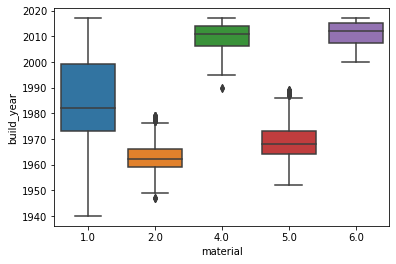

In [1341]:
sns.boxplot(x='material', y='build_year', data=data_train);

In [1342]:
def Func():
    for i in range(1,7):
        Q1 =  data_train[data_train["material"]==i]["build_year"].quantile(0.25)
        Q3 = data_train[data_train["material"]==i]["build_year"].quantile(0.75)
        IQR = Q3 - Q1
        print("material",i,Q1,Q3,IQR)
Func()

material 1 1973.0 1999.0 26.0
material 2 1959.0 1966.0 7.0
material 3 nan nan nan
material 4 2006.0 2014.0 8.0
material 5 1964.0 1973.0 9.0
material 6 2007.25 2015.0 7.75


<p>заметим, что материл строительства менялся с годами, но его достаточно сложно "привязать" к определенным временным интервалам, но можно веделить</p>
<p>два временных промежутка до появления материалов 4 и 6 и после</p>

In [1343]:
data_train_2004_1=data_train[data_train["build_year"]<=2004]
data_train_2004_2=data_train[data_train["build_year"]>2004]
data_train.loc[(data_train.material.isnull())&(data_train["build_year"]<=2004),'material']=int(data_train_2004_1["material"].mean())
data_train.loc[(data_train.material.isnull())&(data_train["build_year"]>2004),'material']=int(data_train_2004_2["material"].mean())

<h3>6)для null значений max_floor state и  floor возьмем средние значения</h3>

In [1344]:
data_train.loc[data_train.max_floor.isnull(),'max_floor']=int(data_train["max_floor"].mean())
data_train.loc[data_train.state.isnull(),'state']=int(data_train["state"].mean())
data_train.loc[data_train.floor.isnull(),'floor']=int(data_train["floor"].mean())

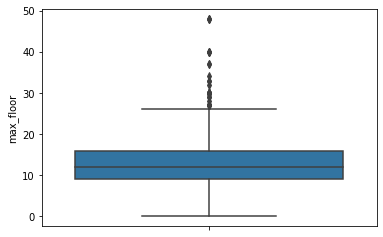

In [1345]:
sns.boxplot( y='max_floor', data=data_train);

In [1346]:
data_train=data_train.drop(data_train[data_train["max_floor"]>28].index)

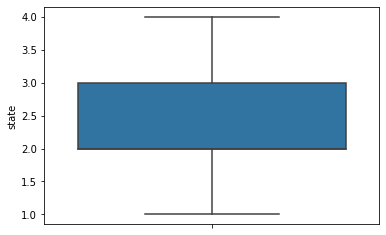

In [1347]:
sns.boxplot( y='state', data=data_train);

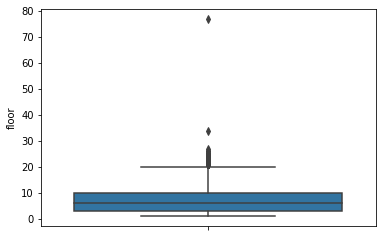

In [1348]:
sns.boxplot( y='floor', data=data_train);

In [1349]:
data_train=data_train.drop(data_train[data_train["floor"]>20].index)

<h3>7)Изменим тип данных у timestamp и удалим даты где дата продажи меньше даты постройки дома</h3>

In [1350]:
data_train['timestamp'] = pd.to_datetime(data_train['timestamp'], format='%Y-%m-%d')

In [1351]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11208 entries, 0 to 15090
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          11208 non-null  int64         
 1   timestamp   11208 non-null  datetime64[ns]
 2   full_sq     11208 non-null  int64         
 3   life_sq     11208 non-null  float64       
 4   floor       11208 non-null  float64       
 5   state       11208 non-null  float64       
 6   max_floor   11208 non-null  float64       
 7   material    11208 non-null  float64       
 8   build_year  11208 non-null  float64       
 9   num_room    11208 non-null  float64       
 10  kitch_sq    11208 non-null  float64       
 11  full_all    11208 non-null  int64         
 12  sub_area    11208 non-null  object        
 13  price_doc   11208 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4), object(1)
memory usage: 1.3+ MB


In [1352]:
data_train[data_train["timestamp"].dt.year<data_train["build_year"]]

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc
4,30052,2015-05-29,80,55.000,15.0,1.0,24.0,6.0,2017.0,3.0,12.0,76284,Nagatinskij Zaton,12697154
112,26247,2014-12-11,63,30.000,4.0,1.0,4.0,1.0,2015.0,2.0,12.0,9553,Poselenie Voskresenskoe,6570520
299,21504,2014-08-13,75,44.000,14.0,1.0,17.0,1.0,2015.0,3.0,10.0,247469,Nekrasovka,6993600
327,23295,2014-10-06,39,18.721,9.0,1.0,20.0,1.0,2016.0,1.0,10.0,115352,Nagornoe,8630820
480,28866,2015-04-03,65,33.000,3.0,1.0,3.0,1.0,2016.0,2.0,10.0,87713,Zapadnoe Degunino,5672400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14926,12476,2013-11-25,61,29.393,7.0,1.0,7.0,1.0,2014.0,2.0,1.0,17790,Poselenie Vnukovskoe,6341036
14970,29764,2015-05-18,64,29.393,2.0,1.0,17.0,4.0,2016.0,2.0,1.0,7341,Poselenie Moskovskij,6289886
14988,25200,2014-11-24,78,43.624,1.0,1.0,3.0,4.0,2015.0,3.0,10.0,2942,Poselenie Filimonkovskoe,6344862
14994,28012,2015-02-20,51,27.000,3.0,1.0,3.0,4.0,2016.0,2.0,10.0,8384,Poselenie Novofedorovskoe,2949976


In [1353]:
data_train=data_train.drop(data_train[data_train["timestamp"].dt.year<data_train["build_year"]].index)

<h3>8)Изменим тип данных у sub_area</h3>

In [1354]:
from sklearn.preprocessing import LabelEncoder

In [1355]:
data_train['sub_area'] = LabelEncoder().fit_transform(data_train.sub_area)

<h3>9)Удалим выбросы у full_sq</h3>

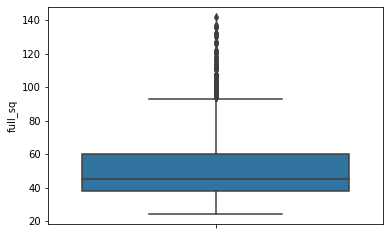

In [1356]:
sns.boxplot( y='full_sq', data=data_train);

In [1357]:
data_train=data_train.drop(data_train[data_train["full_sq"]>97].index)

<h3>10)Удалим выбросы у price_doc</h3>

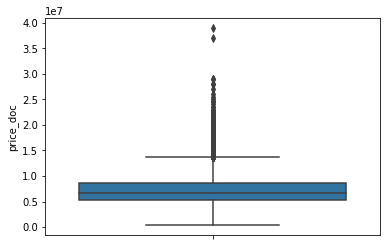

In [1358]:
sns.boxplot( y='price_doc', data=data_train);

In [1359]:
data_train=data_train.drop(data_train[data_train["price_doc"]>1.5*10000000].index)

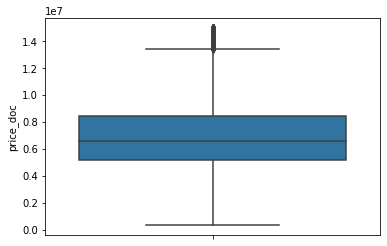

In [1360]:
sns.boxplot( y='price_doc', data=data_train);

In [1361]:
data_train=data_train.drop(data_train[data_train["price_doc"]>1.4*10000000].index)

<h3>Проверим,что изменили все признаки в data_train</h3>

In [1362]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10392 entries, 0 to 15090
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          10392 non-null  int64         
 1   timestamp   10392 non-null  datetime64[ns]
 2   full_sq     10392 non-null  int64         
 3   life_sq     10392 non-null  float64       
 4   floor       10392 non-null  float64       
 5   state       10392 non-null  float64       
 6   max_floor   10392 non-null  float64       
 7   material    10392 non-null  float64       
 8   build_year  10392 non-null  float64       
 9   num_room    10392 non-null  float64       
 10  kitch_sq    10392 non-null  float64       
 11  full_all    10392 non-null  int64         
 12  sub_area    10392 non-null  int32         
 13  price_doc   10392 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int32(1), int64(4)
memory usage: 1.1 MB


In [1363]:
data_macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             2484 non-null   object 
 1   salary                2191 non-null   float64
 2   fixed_basket          2484 non-null   float64
 3   rent_price_3room_eco  2211 non-null   float64
 4   rent_price_2room_eco  2211 non-null   float64
 5   rent_price_1room_eco  2211 non-null   float64
 6   average_life_exp      2191 non-null   float64
dtypes: float64(6), object(1)
memory usage: 136.0+ KB


<h3>9)Изменим тип данных у timestamp</h3>

In [1364]:
data_macro['timestamp'] = pd.to_datetime(data_macro['timestamp'], format='%Y-%m-%d')

<h3>10) У salary отсутствовали выбросы, поэтому null-значениям просто присвоим среднее значение</h3>

In [1365]:
data_macro.loc[data_macro.salary.isnull(),'salary']=data_macro["salary"].mean()

<h3>11)присвоим null-значениям среднее значение и удалим выбросы rent_price_3room_eco</h3>

In [1366]:
data_macro=data_macro.drop(data_macro[data_macro["rent_price_3room_eco"]<40].index)

In [1367]:
data_macro.loc[data_macro.rent_price_3room_eco.isnull(),'rent_price_3room_eco']=data_macro["rent_price_3room_eco"].mean()

<h3>12)присвоим null-значениям среднее значение и удалим выбросы rent_price_2room_eco</h3>

In [1368]:
data_macro=data_macro.drop(data_macro[data_macro["rent_price_2room_eco"]<10].index)

In [1369]:
data_macro.loc[data_macro.rent_price_2room_eco.isnull(),'rent_price_2room_eco']=data_macro["rent_price_2room_eco"].mean()

<h3>13)присвоим null-значениям среднее значение и удалим выбросы rent_price_1room_eco</h3>

In [1370]:
data_macro=data_macro.drop(data_macro[data_macro["rent_price_1room_eco"]<5].index)

In [1371]:
data_macro.loc[data_macro.rent_price_1room_eco.isnull(),'rent_price_1room_eco']=data_macro["rent_price_1room_eco"].mean()

<h3>14)присвоим null-значениям среднее значение и удалим выбросы average_life_exp</h3>

In [1372]:
data_macro=data_macro.drop(data_macro[data_macro["average_life_exp"]<5].index)

In [1373]:
data_macro.loc[data_macro.average_life_exp.isnull(),'average_life_exp']=data_macro["average_life_exp"].mean()

<h4>Проверим, что изменились все признаки у data_macro</h4>

In [1374]:
data_macro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 2483
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   timestamp             2394 non-null   datetime64[ns]
 1   salary                2394 non-null   float64       
 2   fixed_basket          2394 non-null   float64       
 3   rent_price_3room_eco  2394 non-null   float64       
 4   rent_price_2room_eco  2394 non-null   float64       
 5   rent_price_1room_eco  2394 non-null   float64       
 6   average_life_exp      2394 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 214.2 KB


<h2>Объединим dataframe</h2>

In [1375]:
df_merge = pd.merge(data_train, data_macro,on="timestamp")

In [1376]:
df_merge.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,price_doc,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,13324,2013-12-23,42,28.000,8.0,2.0,9.0,1.0,1969.0,2.0,6.0,43795,83,7100000,55485.2,15417.34,48.5,42.0,33.97,76.37
1,13327,2013-12-23,79,45.000,11.0,2.0,22.0,1.0,1988.0,3.0,9.0,130229,67,10300000,55485.2,15417.34,48.5,42.0,33.97,76.37
2,13321,2013-12-23,38,23.000,9.0,3.0,9.0,1.0,1963.0,2.0,7.0,102590,20,1000000,55485.2,15417.34,48.5,42.0,33.97,76.37
3,13348,2013-12-23,56,29.393,3.0,1.0,12.0,6.0,2013.0,2.0,6.0,39873,100,5194980,55485.2,15417.34,48.5,42.0,33.97,76.37
4,13325,2013-12-23,73,44.000,17.0,3.0,2.0,1.0,1988.0,3.0,10.0,130229,67,11000000,55485.2,15417.34,48.5,42.0,33.97,76.37


In [1377]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10333 entries, 0 to 10332
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10333 non-null  int64         
 1   timestamp             10333 non-null  datetime64[ns]
 2   full_sq               10333 non-null  int64         
 3   life_sq               10333 non-null  float64       
 4   floor                 10333 non-null  float64       
 5   state                 10333 non-null  float64       
 6   max_floor             10333 non-null  float64       
 7   material              10333 non-null  float64       
 8   build_year            10333 non-null  float64       
 9   num_room              10333 non-null  float64       
 10  kitch_sq              10333 non-null  float64       
 11  full_all              10333 non-null  int64         
 12  sub_area              10333 non-null  int32         
 13  price_doc       

<h2>Сделаем визуализацию данных во взаимосвязи</h2>

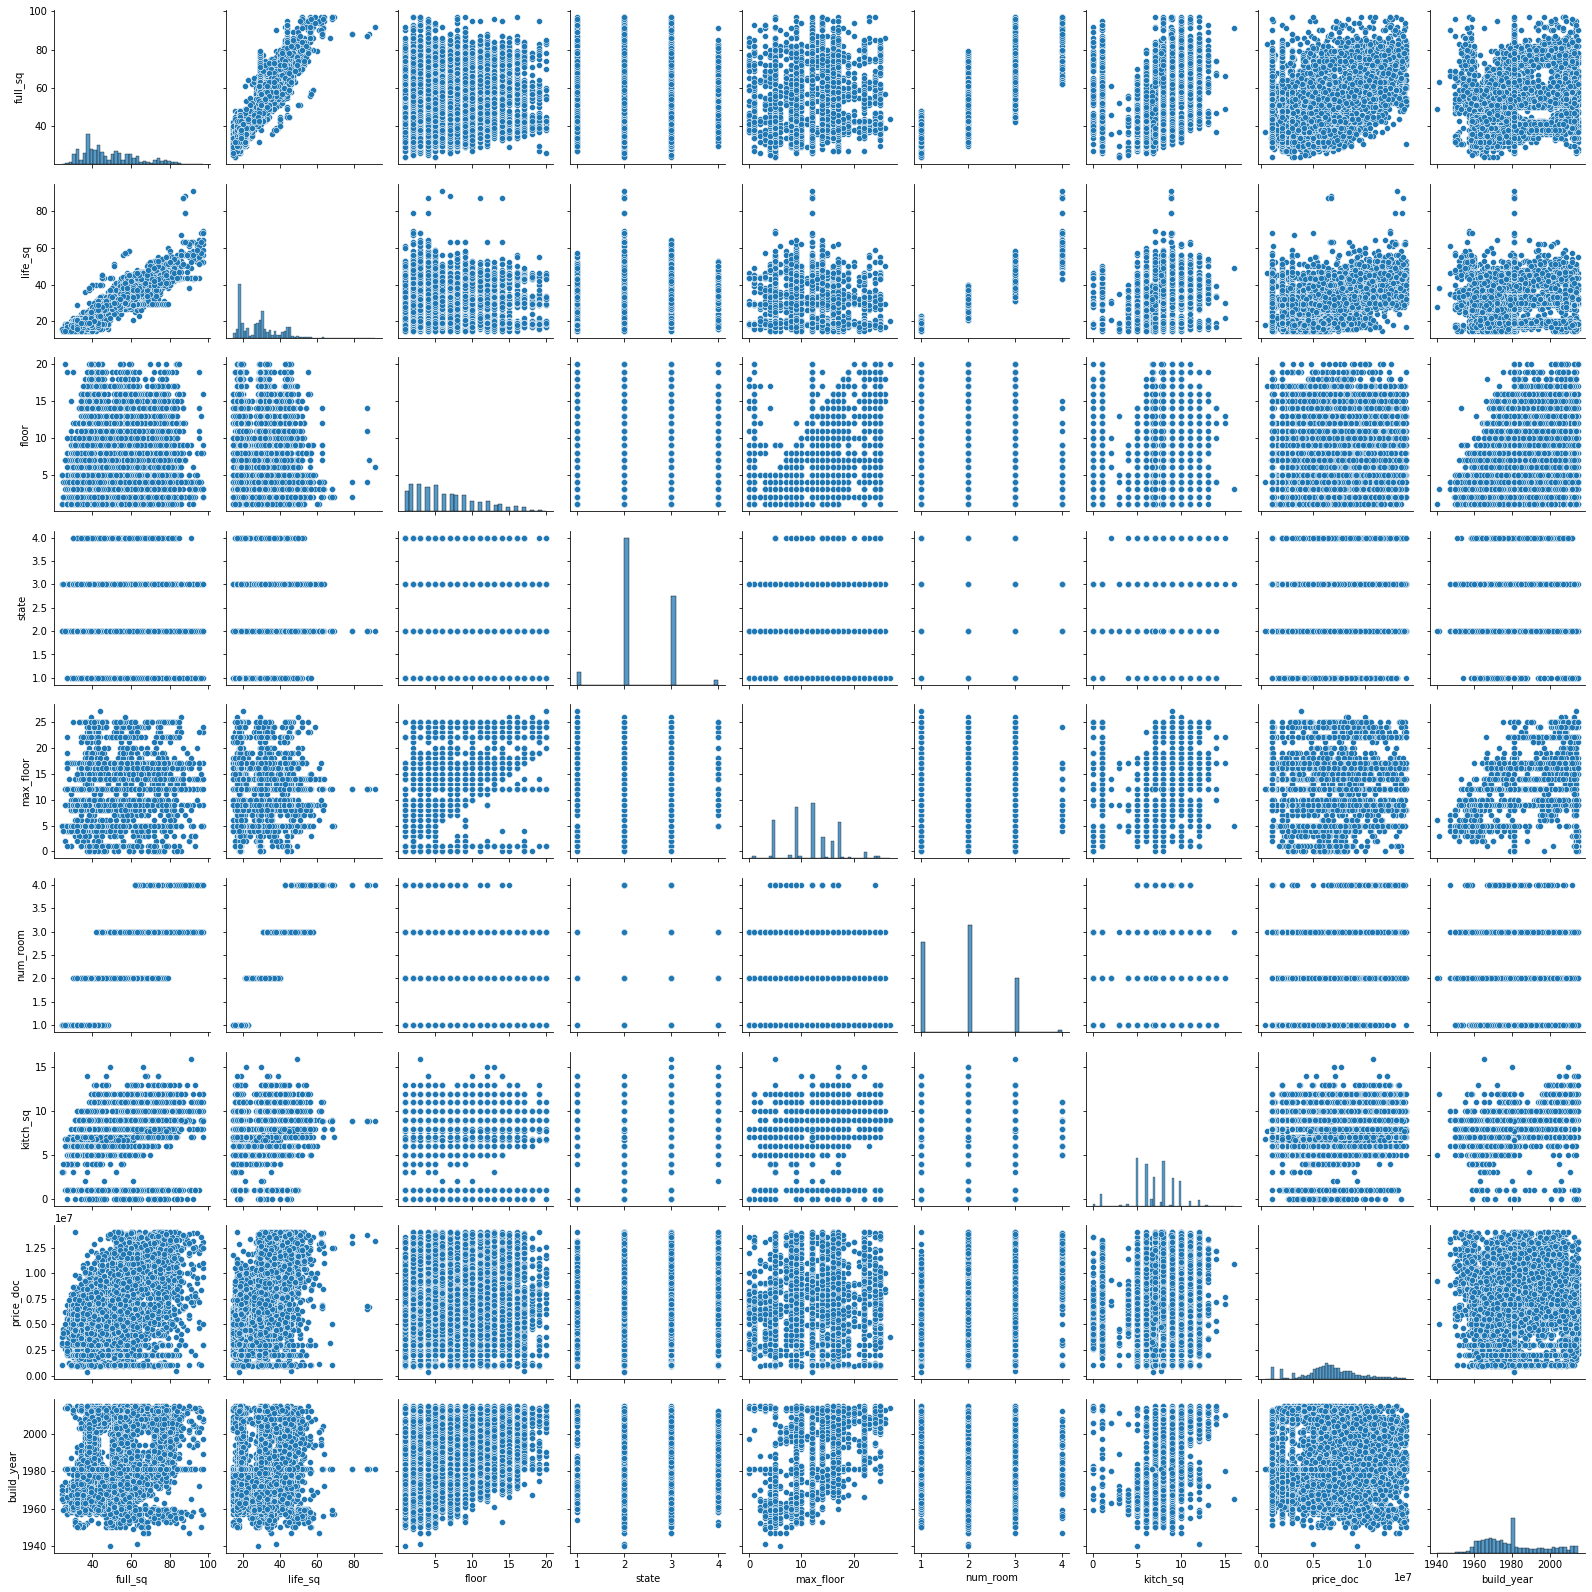

In [1378]:
sns.pairplot(data_train[['full_sq','life_sq','floor','state','max_floor','num_room','kitch_sq','price_doc','build_year']])

<p>больше всего на цену влияют:full_sq, state, num_room,life_sq,kith_sq</p>

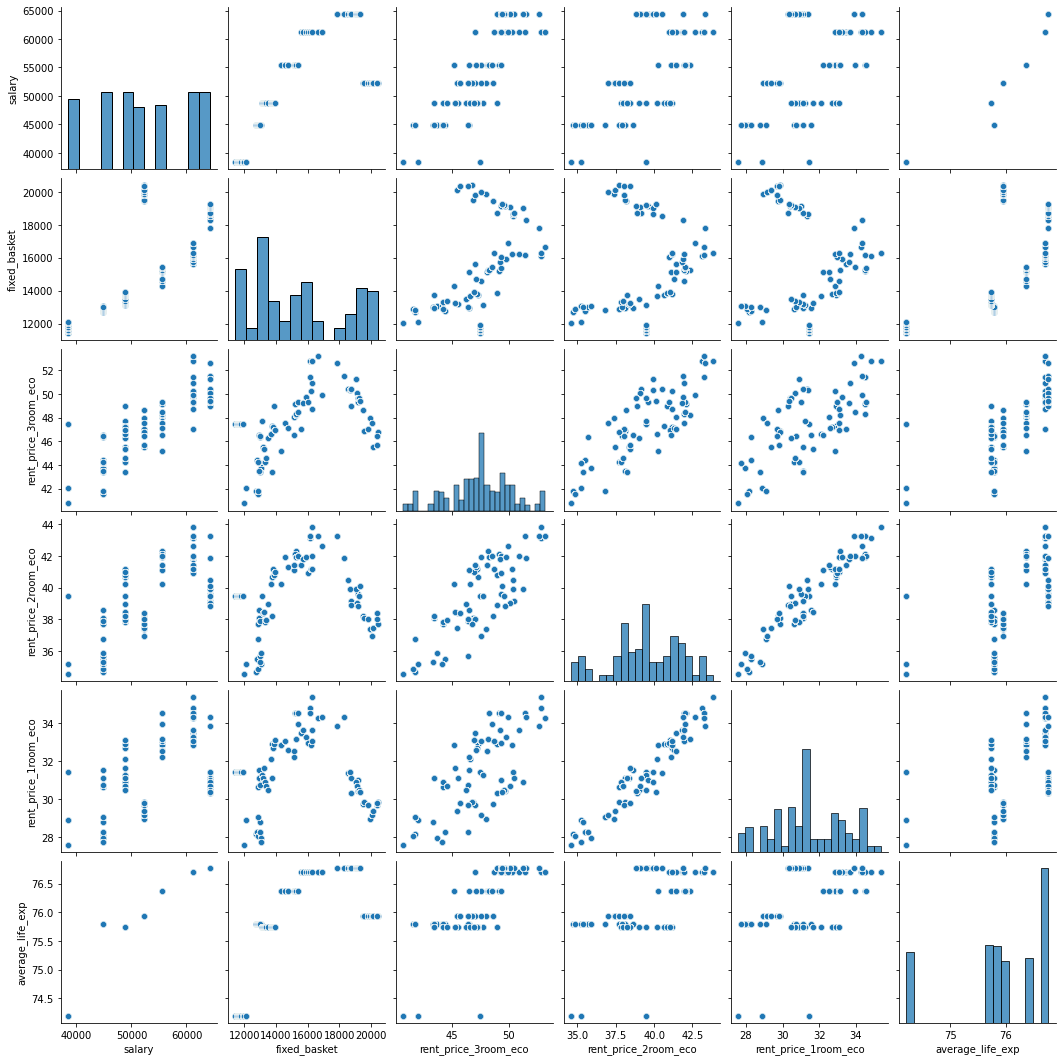

In [1379]:
sns.pairplot(data_macro[['salary','fixed_basket','rent_price_3room_eco','rent_price_2room_eco','rent_price_1room_eco','average_life_exp']])

<p>чем выше средняя зарплата в регионе, тем выше средняя аренда жилья</p>

<AxesSubplot:xlabel='num_room', ylabel='floor'>

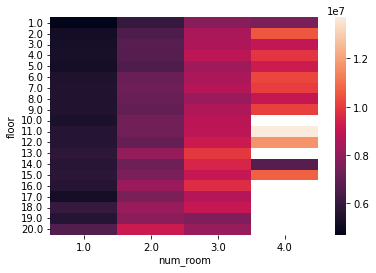

In [1380]:
pivot = data_train.pivot_table(
    index=["floor"],
    columns=["num_room"],
    values="price_doc",
    aggfunc=np.average)
sns.heatmap(pivot)

<p>Чем выше этаж и больше комнат, тем выше стоимость квартиры</p>

<AxesSubplot:xlabel='life_sq', ylabel='full_sq'>

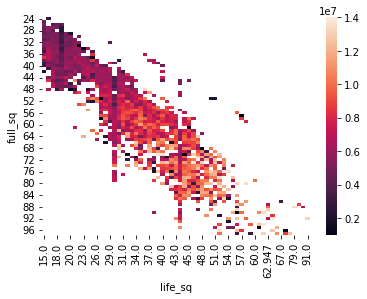

In [1381]:
pivot = data_train.pivot_table(
    index=["full_sq"],
    columns=["life_sq"],
    values="price_doc",
    aggfunc=np.average)
sns.heatmap(pivot)

<p>Чем выше жилая площадь, тем выше стоимость</p>

<AxesSubplot:xlabel='num_room', ylabel='state'>

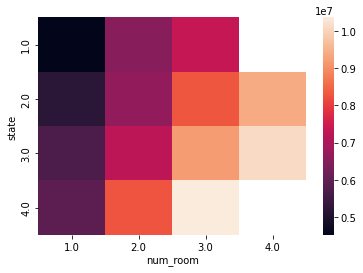

In [1382]:
pivot = data_train.pivot_table(
    index=["state"],
    columns=["num_room"],
    values="price_doc",
    aggfunc=np.average)
sns.heatmap(pivot)

<p>Чем выше состояние жилья и чем больше кол-во комнат, тем выше стоимость</p>

<AxesSubplot:xlabel='num_room', ylabel='material'>

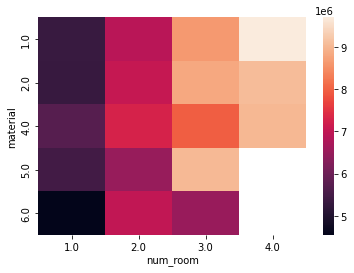

In [1383]:
pivot = data_train.pivot_table(
    index=["material"],
    columns=["num_room"],
    values="price_doc",
    aggfunc=np.average)
sns.heatmap(pivot)

<p>Больше всего ценятся 2 и 5 материалы</p>

<AxesSubplot:xlabel='num_room', ylabel='kitch_sq'>

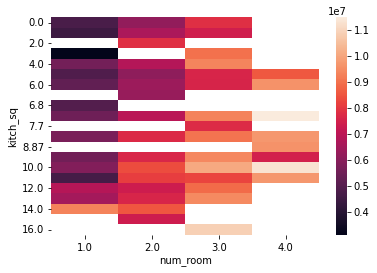

In [1384]:
pivot = data_train.pivot_table(
    index=["kitch_sq"],
    columns=["num_room"],
    values="price_doc",
    aggfunc=np.average)
sns.heatmap(pivot)

<p>площадь кухни не влияет на стоимость квартиры</p>

<AxesSubplot:xlabel='num_room', ylabel='salary'>

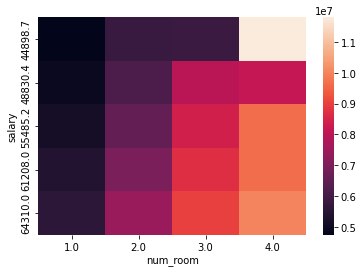

In [1385]:
pivot = df_merge.pivot_table(
    index=["salary"],
    columns=["num_room"],
    values="price_doc",
    aggfunc=np.average)
sns.heatmap(pivot)

<p>зарплата в регионе влияет на стоимость квартиры</p>

<h3>Вывод: на стоимость влияют floor,life_sq,full_sq,material,state,salary,num_room</h3>

In [1386]:
df_merge=df_merge[['floor','life_sq','full_sq','material','state','salary','num_room','price_doc']]

In [1387]:
df_merge.head()

,floor,life_sq,full_sq,material,state,salary,num_room,price_doc
0,8.0,28.000,42,1.0,2.0,55485.2,2.0,7100000
1,11.0,45.000,79,1.0,2.0,55485.2,3.0,10300000
2,9.0,23.000,38,1.0,3.0,55485.2,2.0,1000000
3,3.0,29.393,56,6.0,1.0,55485.2,2.0,5194980
4,17.0,44.000,73,1.0,3.0,55485.2,3.0,11000000


<h2>Шкалирование данных</h2>

In [1388]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [1389]:
sc = StandardScaler()
df_standart_scaler= sc.fit_transform(df_merge)
df_standart_scaler

array([[ 0.31435645, -0.06335856, -0.48923292, ..., -1.13354255,
         0.15952824,  0.12892612],
       [ 1.00036389,  1.68718025,  2.14274324, ..., -1.13354255,
         1.46158613,  1.24762731],
       [ 0.5430256 , -0.57822292, -0.77377088, ..., -1.13354255,
         0.15952824, -2.00359802],
       ...,
       [-0.14298184,  0.14258718,  0.79118792, ..., -1.13354255,
         0.15952824, -0.61663229],
       [ 2.37237878,  1.54548958,  1.00459139, ..., -2.90728101,
         1.46158613, -0.69104934],
       [ 0.77169475,  1.68718025,  2.07160875, ..., -2.90728101,
         1.46158613,  2.47120674]])

In [1390]:
rs = RobustScaler()
df_standart_robust = rs.fit_transform(df_merge)
df_standart_robust

array([[ 0.33333333,  0.        , -0.15      , ..., -1.        ,
         0.        ,  0.15625   ],
       [ 0.83333333,  1.13333333,  1.7       , ..., -1.        ,
         1.        ,  1.15625   ],
       [ 0.5       , -0.33333333, -0.35      , ..., -1.        ,
         0.        , -1.75      ],
       ...,
       [ 0.        ,  0.13333333,  0.75      , ..., -1.        ,
         0.        , -0.5102    ],
       [ 1.83333333,  1.0416    ,  0.9       , ..., -2.16285734,
         1.        , -0.57672094],
       [ 0.66666667,  1.13333333,  1.65      , ..., -2.16285734,
         1.        ,  2.25      ]])

<h2>Baseline решение</h2>

<h3>Решение без преобразования признаков. На тех столбцах,которые можно использовать исходно</h3>

In [1391]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1392]:
data_train_2=pd.read_csv("train.csv",sep=",")
data_macro_2=pd.read_csv("macro.csv",sep=",")

In [1393]:
df_merge_2 = pd.merge(data_train_2, data_macro_2,on="timestamp")
df_merge_2=df_merge_2.fillna(0)

In [1394]:
train=df_merge_2[['floor','life_sq','full_sq','material','state','salary','num_room']]
target=df_merge_2['price_doc']

In [1395]:
X_train, X_test, y_train, y_test = train_test_split(train,target.ravel(),test_size=0.2,random_state=42)

<p>Создаем, обучаем и проверяем модель на тестовом наборе данных</p>

In [1396]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

2988614.910880322

In [1397]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

2255114.942749155

In [1398]:
model = LassoCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

3080447.393676549

In [1399]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

2565959.687245937

<h2>Решение c преобразованием признаков. Но без шкалирования признаков</h2>

In [1400]:
train=df_merge[['floor','life_sq','full_sq','material','state','salary','num_room']]
target=df_merge['price_doc']
X_train, X_test, y_train, y_test = train_test_split(train,target.ravel(),test_size=0.2,random_state=42)

<p>Создаем, обучаем и проверяем модель на тестовом наборе данных</p>

In [1401]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

2380578.1580877597

In [1402]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

1920893.7721253166

In [1403]:
model = LassoCV()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

1872313.5620560267

In [1404]:
model = LinearRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
mean_absolute_error(y_test, predict)

1831282.6564114445

<p>После преобразования признаков результат улучшился</p>
<p>У LinearRegression самый высокий показатель</p>

<h2>POST анализ модели</h2>

In [1405]:
predict = model.predict(X_test)
predict

array([5645216.69597038, 6874756.9835068 , 5540450.54852405, ...,
       8355984.0612267 , 7980046.31035387, 4670693.66916423])

In [1406]:
features_name = df_merge.select_dtypes(exclude=["object"]).columns
print(f"Параметр b0: {logreg.intercept_}")
print(f"Значениея остальных параметров бетта:")
coef_dict = {feature:coef for feature, coef in zip(features_name, logreg.coef_[0])}
coef_dict = {key:val for key, val in sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)}
for item in coef_dict.items():
    print(*item)

Параметр b0: [ 1.87271980e-07 -1.02647805e-07  2.02386485e-06 ... -8.05482336e-08
  1.87272059e-07 -4.11267653e-07]
Значениея остальных параметров бетта:
full_sq 4.6913935672955466e-05
life_sq 2.460238079783494e-05
salary -1.6064560602128718e-05
floor 1.2685469925872573e-05
num_room 1.6011885132961549e-06
material -4.265464441121416e-07
state 7.220919773432094e-08


<h2>Проанализируем данные test</h2>

In [1438]:
data_test=pd.read_csv("test.csv",sep=",")

In [1439]:
data_test.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area
0,1417,2012-03-03,51,31.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,221709,Krjukovo
1,9725,2013-08-08,44,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.0,37502,Sviblovo
2,30369,2015-06-23,32,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.0,125354,Chertanovo Severnoe
3,20522,2014-07-02,51,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.0,130229,Moskvorech'e-Saburovo
4,12891,2013-12-07,44,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.0,145576,Caricyno


In [1440]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          3774 non-null   int64  
 1   timestamp   3774 non-null   object 
 2   full_sq     3774 non-null   int64  
 3   life_sq     3463 non-null   float64
 4   floor       3769 non-null   float64
 5   state       3139 non-null   float64
 6   max_floor   3507 non-null   float64
 7   material    3507 non-null   float64
 8   build_year  3391 non-null   float64
 9   num_room    3507 non-null   float64
 10  kitch_sq    3507 non-null   float64
 11  full_all    3774 non-null   int64  
 12  sub_area    3774 non-null   object 
dtypes: float64(8), int64(3), object(2)
memory usage: 383.4+ KB


<h3>Изменим null значения на  средние значения</h3>

In [1441]:
data_test.loc[data_test['life_sq'].isna(),'life_sq'] = data_test['life_sq'].mean()
data_test.loc[data_test['floor'].isna(),'floor'] = int(data_test['floor'].mean())
data_test.loc[data_test['state'].isna(),'state'] = int(data_test['state'].mean())
data_test.loc[data_test['max_floor'].isna(),'max_floor'] = int(data_test['max_floor'].mean())
data_test.loc[data_test['material'].isna(),'material'] = int(data_test['material'].mean())
data_test.loc[data_test['build_year'].isna(),'build_year'] = int(data_test['build_year'].mean())
data_test.loc[data_test['num_room'].isna(),'num_room'] = int(data_test['num_room'].mean())
data_test.loc[data_test['kitch_sq'].isna(),'kitch_sq'] = data_test['kitch_sq'].mean()

In [1442]:
data_test['timestamp'] = pd.to_datetime(data_test['timestamp'], format='%Y-%m-%d')

In [1443]:
data_test = pd.merge(data_test, data_macro,on="timestamp",how="left")

In [1444]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 3773
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3774 non-null   int64         
 1   timestamp             3774 non-null   datetime64[ns]
 2   full_sq               3774 non-null   int64         
 3   life_sq               3774 non-null   float64       
 4   floor                 3774 non-null   float64       
 5   state                 3774 non-null   float64       
 6   max_floor             3774 non-null   float64       
 7   material              3774 non-null   float64       
 8   build_year            3774 non-null   float64       
 9   num_room              3774 non-null   float64       
 10  kitch_sq              3774 non-null   float64       
 11  full_all              3774 non-null   int64         
 12  sub_area              3774 non-null   object        
 13  salary            

In [1452]:
data_test=data_test.fillna(0)

In [1453]:
data_test.head()

,id,timestamp,full_sq,life_sq,floor,state,max_floor,material,build_year,num_room,kitch_sq,full_all,sub_area,salary,fixed_basket,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,average_life_exp
0,1417,2012-03-03,51,31.0,16.0,2.0,12.0,1.0,1876.0,1.0,6.911605,221709,Krjukovo,48830.4,13243.77,45.31,38.45,31.64,75.74
1,9725,2013-08-08,44,29.0,5.0,3.0,9.0,1.0,1969.0,2.0,5.000000,37502,Sviblovo,55485.2,15241.93,48.22,42.33,33.15,76.37
2,30369,2015-06-23,32,18.0,1.0,3.0,9.0,1.0,1970.0,1.0,6.000000,125354,Chertanovo Severnoe,64310.0,18720.65,49.01,38.91,30.29,76.77
3,20522,2014-07-02,51,30.0,11.0,1.0,17.0,1.0,2003.0,2.0,9.000000,130229,Moskvorech'e-Saburovo,61208.0,16251.41,50.93,41.97,33.67,76.70
4,12891,2013-12-07,44,28.0,4.0,2.0,5.0,1.0,1965.0,2.0,5.000000,145576,Caricyno,55485.2,15417.34,48.50,42.00,33.97,76.37


In [1454]:
pred = model.predict(data_test[['floor','life_sq','full_sq','material','state','salary','num_room']])
len(pred)

3774

In [1455]:
pred

array([ 6106160.18077237,  6507491.23530339,  5624159.33727652, ...,
        6090592.10990602, 12831151.21045156,  7068145.05019724])

In [1463]:
test=pd.read_csv("test.csv")
output = pd.DataFrame({'price_doc': pred})
output.to_csv('s.csv', index=True, index_label="id")